# Mouvement d'une particule chargée dans un champ magnétique simple

Ce code a été conçu en TP d'informatique sous la guidance d'Andrea Ciardi dans le cadre du master PPF,
puis retravaillé qelque peu par curiosité sur les tokamaks.

Auteurs : Clément Moissard & Luke Duthoit

## Importer modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clement/.local/lib/python3.6/site-packages/matplotlib/mpl-d

## Definition fonctions diverses et classe particule

In [2]:


def prodvec(a,b):
    """Calcul d'un produit vectoriel"""
    c=np.array([a[1]*b[2]-a[2]*b[1],a[2]*b[0]-a[0]*b[2],a[0]*b[1]-a[1]*b[0]])
    return c


class Particule:
   partCount = 0

   def __init__(self, name, x_0, v_0, q, m, couleur):
      self.name = name
      self.x_0  = x_0
      self.v_0  = v_0
      self.q    = q
      self.m    = m
      self.x    = [x_0]
      self.v    = [v_0]
      self.couleur = couleur
      Particule.partCount += 1
      
#   def displayParticule(self):
#     print "Name : ",self.name, ", Position : ",self.x_0, ", Vitesse : ",self.v_0, ", Charge : ",self.q, ", Masse : ",self.m
 
    

## Definition constantes, champs et intialisation du problème

In [3]:
# Définition des constantes 

e     = -1.0                  # charge de l'électron
m     = 1.0                   # masse de l'électron

# Définition des champs #1 (Amplitude)

E_0 = 0
B_0 = 5.0
vpara = 0.5
vperp = 1.

# Choix du temps de simulation et définitions associées

w_0   = abs(e*B_0 /m)         # pulsation cyclotron

nn = 20                       # nombre de points par gyration
Dt = 1/nn * 2*np.pi/w_0       # pas de temps = un nn-ième de gyration
n = 100                       # nombre de gyrations
tmax = 2*n*np.pi/w_0          # tmax = n gyrations
Rc   = vperp / w_0

g  = 1 / tmax

temps = np.arange(0,tmax,Dt)  # Définition d'un vecteur temps

# Définition des champs #2 (Forme spatiale)

def ChampE(x,i):
    E = np.array([E_0,0,0])                         # Champ E uniforme
    #E = np.array([E_0,0,0]) * (1-exp(-g * i*Dt))   # Champ E(t)
    return E
    
def ChampB(x,i):
 #   B = np.array([0,0,B_0])                    # Champ B uniforme
    #B = np.array([0,0,B_0*(1+(1./10)*(x[1]/Rc))])   # Champ ayant un gradient
    #B = np.array([0,0,B_0*(1+x[2]**2/(5*Rc))])      # Bouteille magnétique
    
#Tokamak pas vraiment physique    
    r = np.sqrt(x[0]**2+x[2]**2)

    if x[0] > 0 :
        theta = np.arcsin(x[2]/r)
    else :
        theta = np.pi - np.arcsin(x[2]/r)

    B = np.array([-B_0*np.sin(theta),0,B_0*np.cos(theta)])
    return B

# Définition des particules

x_0 = np.array([3,0,0])
v_0 = np.array([0,vperp,vpara])

partListe = []

part1 = Particule("Bob", x_0, v_0,   +e,   m, 'darkturquoise'  )

partListe.append(part1) 

N = Particule.partCount     # Nombre de particules

## Calcul et affichage du mouvement

<IPython.core.display.Javascript object>


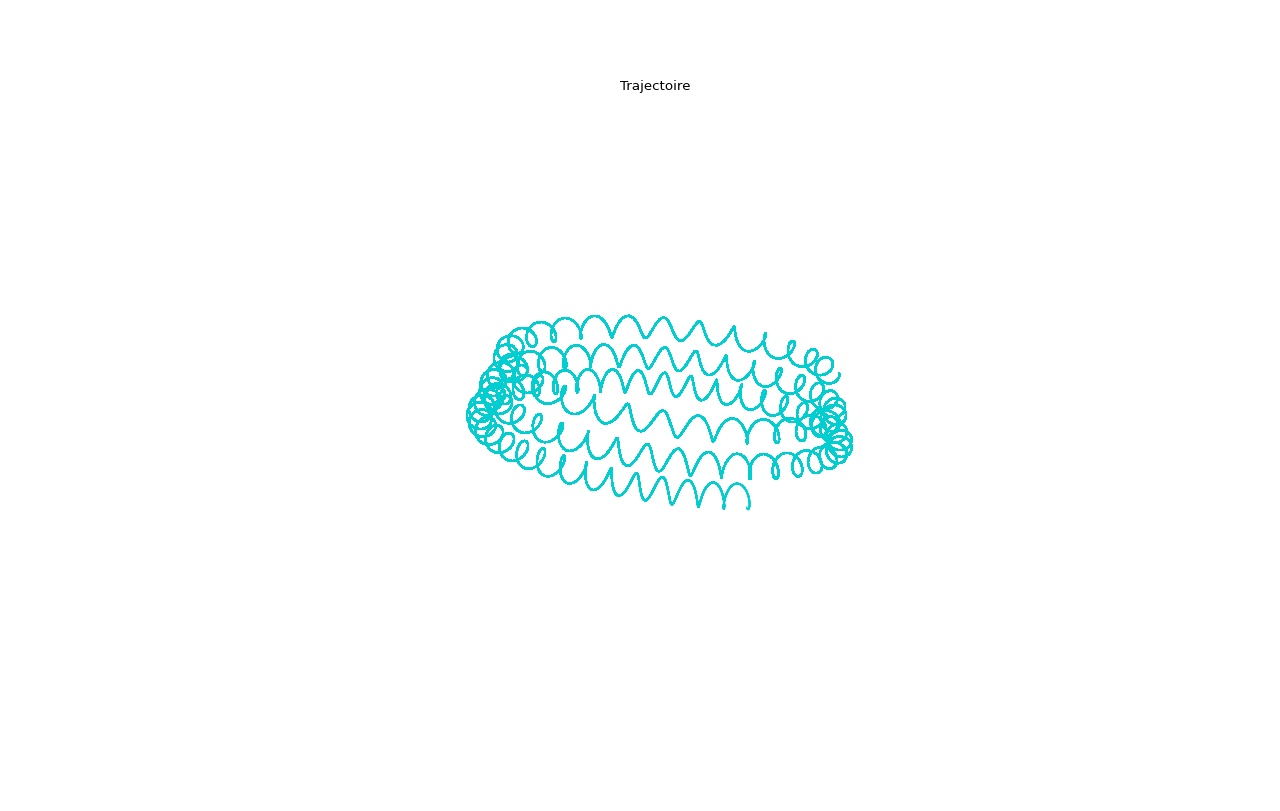

Calcul en cours ...


In [4]:
# permet d'intéragir avec la figure
%matplotlib notebook  

# initialisation de la figure

fig = plt.figure()    
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Trajectoire')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Calcul des vecteurs

for i in range(len(temps)):
        
    for j in range(N):
        
        partj = partListe[j]
      
        x_prev = partj.x[-1]
        v_prev = partj.v[-1]
      
        # Actualisation des champs
        E = ChampE(x_prev,i)
        B = ChampB(x_prev,i)
    
    
        x_i = v_prev*Dt + x_prev
        vmoins = v_prev + (partj.q/partj.m)*E*Dt/2
    
        #Calcul chelou de vplus par la "rotation" des francs maçons
        tvec   = partj.q * Dt * B/(2 * partj.m)
        t      = np.linalg.norm(tvec)
        svec   = tvec * 2/(1 + t**2)
        vprime = vmoins + prodvec(vmoins,tvec)
        vplus  = vmoins + prodvec(vprime,svec)
    
        v_i    = vplus + (partj.q/partj.m)*E*Dt/2      
      
        partListe[j].x.append(x_i)
        partListe[j].v.append(v_i)      
    
#         ax.scatter(partj.x[-1][0],partj.x[-1][1],partj.x[-1][2], color=partj.couleur)
        
#         fig.canvas.draw()
#         fig.canvas.flush_events()

    xj = [x[0] for x in partj.x]
    yj = [x[1] for x in partj.x]
    zj = [x[2] for x in partj.x]
    ax.plot(xj, yj, zj, color=partj.couleur)
    ax.set_box_aspect((np.ptp(xj), np.ptp(yj), np.ptp(zj)))  # aspect ratio is 1:1:1 in data space


print('Calcul en cours ...')   

#vérification

v = partListe[0].v

sx=0
sy=0
sz=0                               # calcul de vmoy

for i in range(len(temps)):
    sx = sx + v[i][0]
    sy = sy + v[i][1]
    sz = sz + v[i][2]
vxmoy = sx / len(temps)
vymoy = sy / len(temps)
vzmoy = sz / len(temps)

print('Calcul terminé !') 
plt.axis('off')
plt.show()
